# House Sales in King County, USA
Predict house price using regression

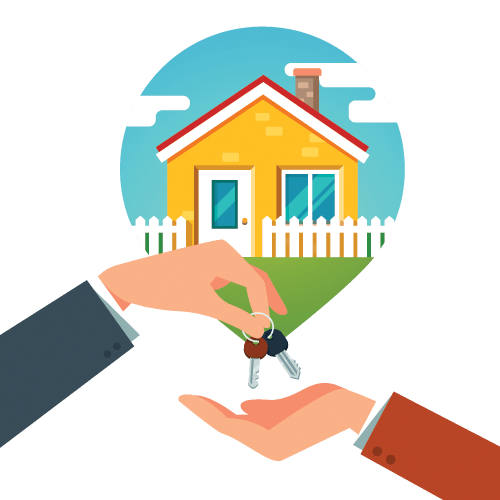

Image Credit: Google

### Introduction: 
First of all, I'm a beginner in the field of Data Science. I want to give credit to Janio Martinez Bachmann and Paramartha Sengupta. Their Kaggle work help me to think on - How to interpret data? What approach should we take while solving a particular problem?

### What are my aims with this project? 

- ##### Extensive Exploratory Data Analysis: 
The motive behind this is to find interesting insights that will give a better understanding of the data.

- ##### Modeling: 
Lastly, implement a predictive model to determine house price.

### Understanding the problem: 
As we are all aware that pricing of house is done based upon certain factors. Some factors are listed below.

#### Factors Effecting House Price:
- No. of Bedrooms
- No. of Bathrooms
- No. of Kitchen
- Location of Property(Centre or Outskirts of City)
- Property Age
- Area of Property
- Total Area of Property
etc.,

To build a house price predictor, we would divide the project in various parts. We will try to interpret the data and will create a model based upon it.


### Part-1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The dataset has following columns.

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.shape

(21613, 21)

#### Column defintions
- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7(4-10) has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

###### Credit: Nova19 from Kaggle
verified from 2 sources:
- https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices
- https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.htm

### Part-2: Data Preprocessing

#### Data Manipulation

In [6]:
#It has been observed that the dataset has an 'date' column. Till now we are not sure what's the importance date column. It will be known while doing visualization. For now we would parse the date columns in correct format. 
#Additionally, there are extra characters in date coulmn. It's in following format YYYYMMDDT000000 as seen below. 
df.date.unique()

array(['20141013T000000', '20141209T000000', '20150225T000000',
       '20150218T000000', '20140512T000000', '20140627T000000',
       '20150115T000000', '20150415T000000', '20150312T000000',
       '20150403T000000', '20140527T000000', '20140528T000000',
       '20141007T000000', '20150124T000000', '20140731T000000',
       '20140529T000000', '20141205T000000', '20150424T000000',
       '20140514T000000', '20140826T000000', '20140703T000000',
       '20140516T000000', '20141120T000000', '20141103T000000',
       '20140626T000000', '20141201T000000', '20140624T000000',
       '20150302T000000', '20141110T000000', '20141203T000000',
       '20140613T000000', '20141230T000000', '20150213T000000',
       '20140620T000000', '20140715T000000', '20140811T000000',
       '20140707T000000', '20141028T000000', '20140729T000000',
       '20140718T000000', '20150325T000000', '20140716T000000',
       '20150428T000000', '20150311T000000', '20140916T000000',
       '20150217T000000', '20141231T0000

In [7]:
#Will get rid of extra characters i.e., T000000
df.date = pd.to_datetime(df.date, format='%Y%m%dT000000', errors='coerce')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

#### Data Types:
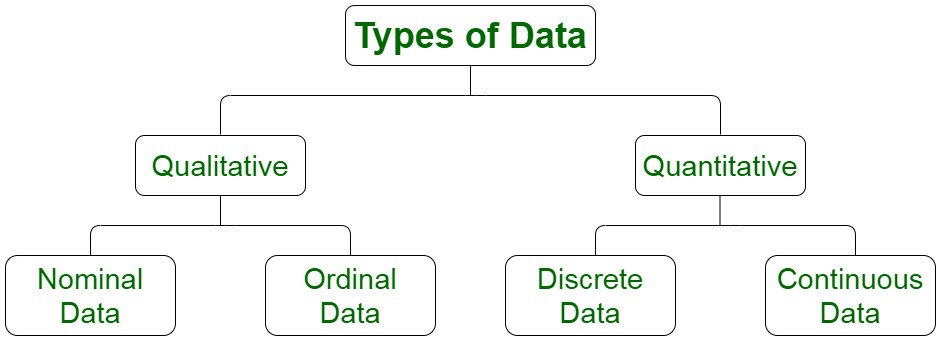

###### Image Credit: GeeksforGeeks

View, Condition,Grade are ordial data. It's type of rating. The prices would be varying much upon these values. Machine learning models require all input and output variables to be numeric. These variables are numeric in our dataset.

Refer for More Info - https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/
By Jason Brownlee

In [9]:
# By default pandas converted date column to datetime64[ns]. We would only require the date as all columns has same time and while exporting data to csv it will have extra 00:00:00.
#dt.date - Need to check. It's getting converted to object

In [11]:
#It has been observed that the dataset has an 'id' column. Let's see whether all id's are unique
print(df['id'].duplicated().sum())
#There are 177 dupliactes id. Let's check whether they hold same values across columns
print(df.duplicated().sum())

177
0


In [12]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [13]:
#age of property
df['age'] = pd.DatetimeIndex(df['date']).year - df['yr_built']

In [14]:
#age from renovation
df['age_renovated'] = 0
df['age_renovated'] = pd.DatetimeIndex(df['date']).year - df['yr_renovated']
indices = df.loc[df['yr_renovated']<1].index
for i in indices:
    df.iloc[i,22]=0

In [15]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,63,23


#### Missing Value Imputation

In [16]:
df.isna().sum()
# The data is clean.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
age              0
age_renovated    0
dtype: int64

#### Expolratory Data Analysis

Distribution of data

In [35]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_renovated
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.317818,0.779947
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.375493,4.895330
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,-1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,80.000000


- Univariate Analysis is the simplest form of analyzing data. Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately. Data is gathered for the purpose of answering a question, or more specifically, a research question.

#### Price Distribution

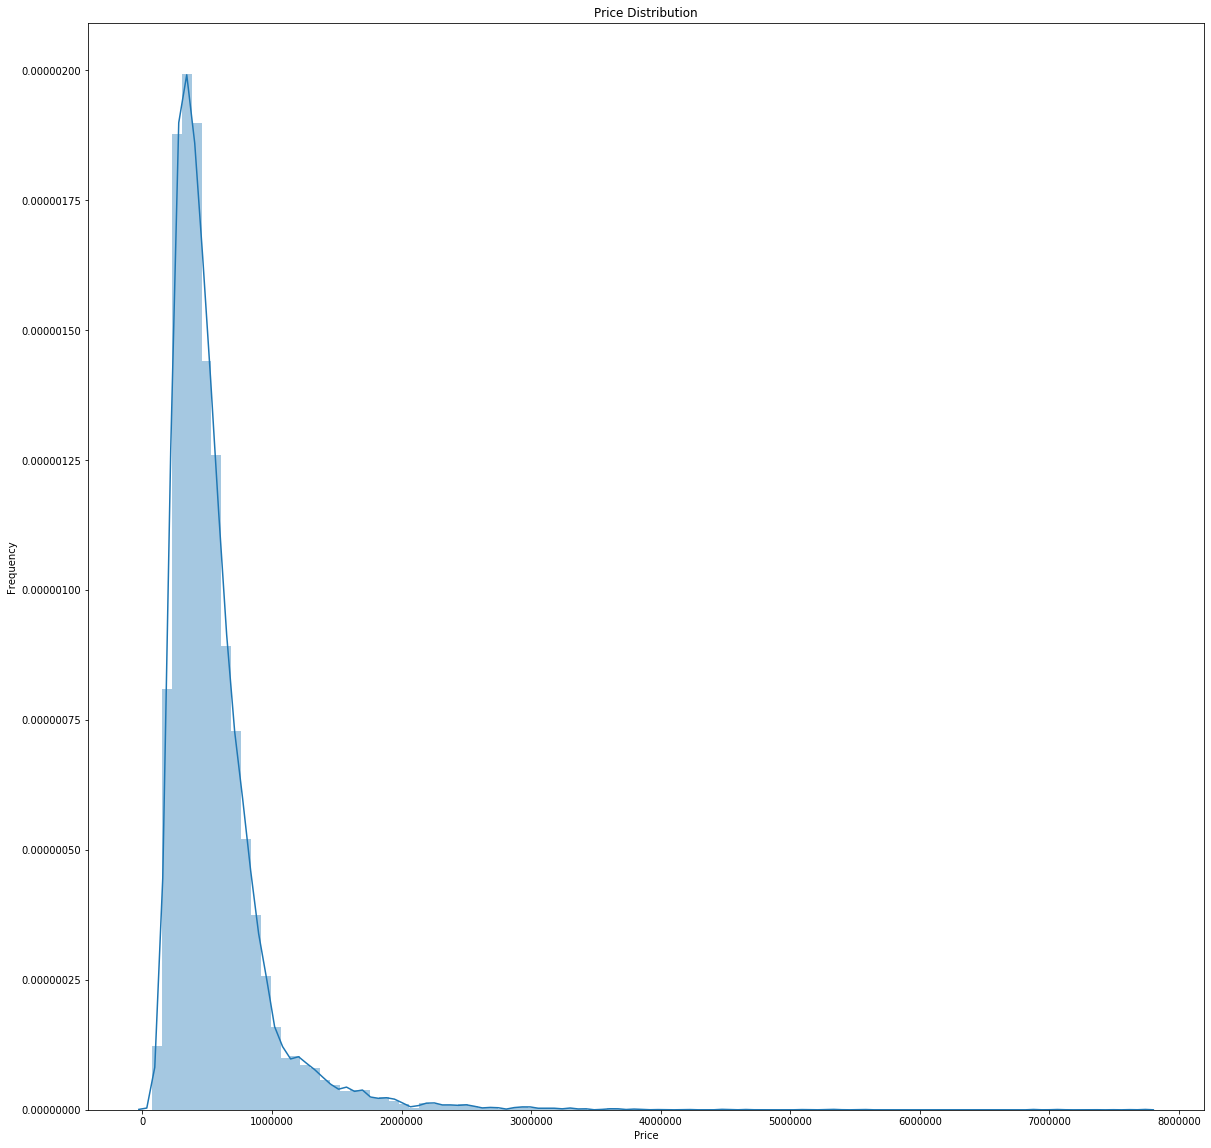

In [82]:
plt.figure(figsize = (20,20))
sns.distplot(df['price'],bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

##### Distribution of Price:
Price is slightly positively skewed. It's expected. Most of the families from common background buys in the range of 75000 to 1500000. The family from higher classes tends to buys property which has price greater 1500000. Thus, property seller build Houses which targets the category of customers which has larger population.

Price Distribution against View 

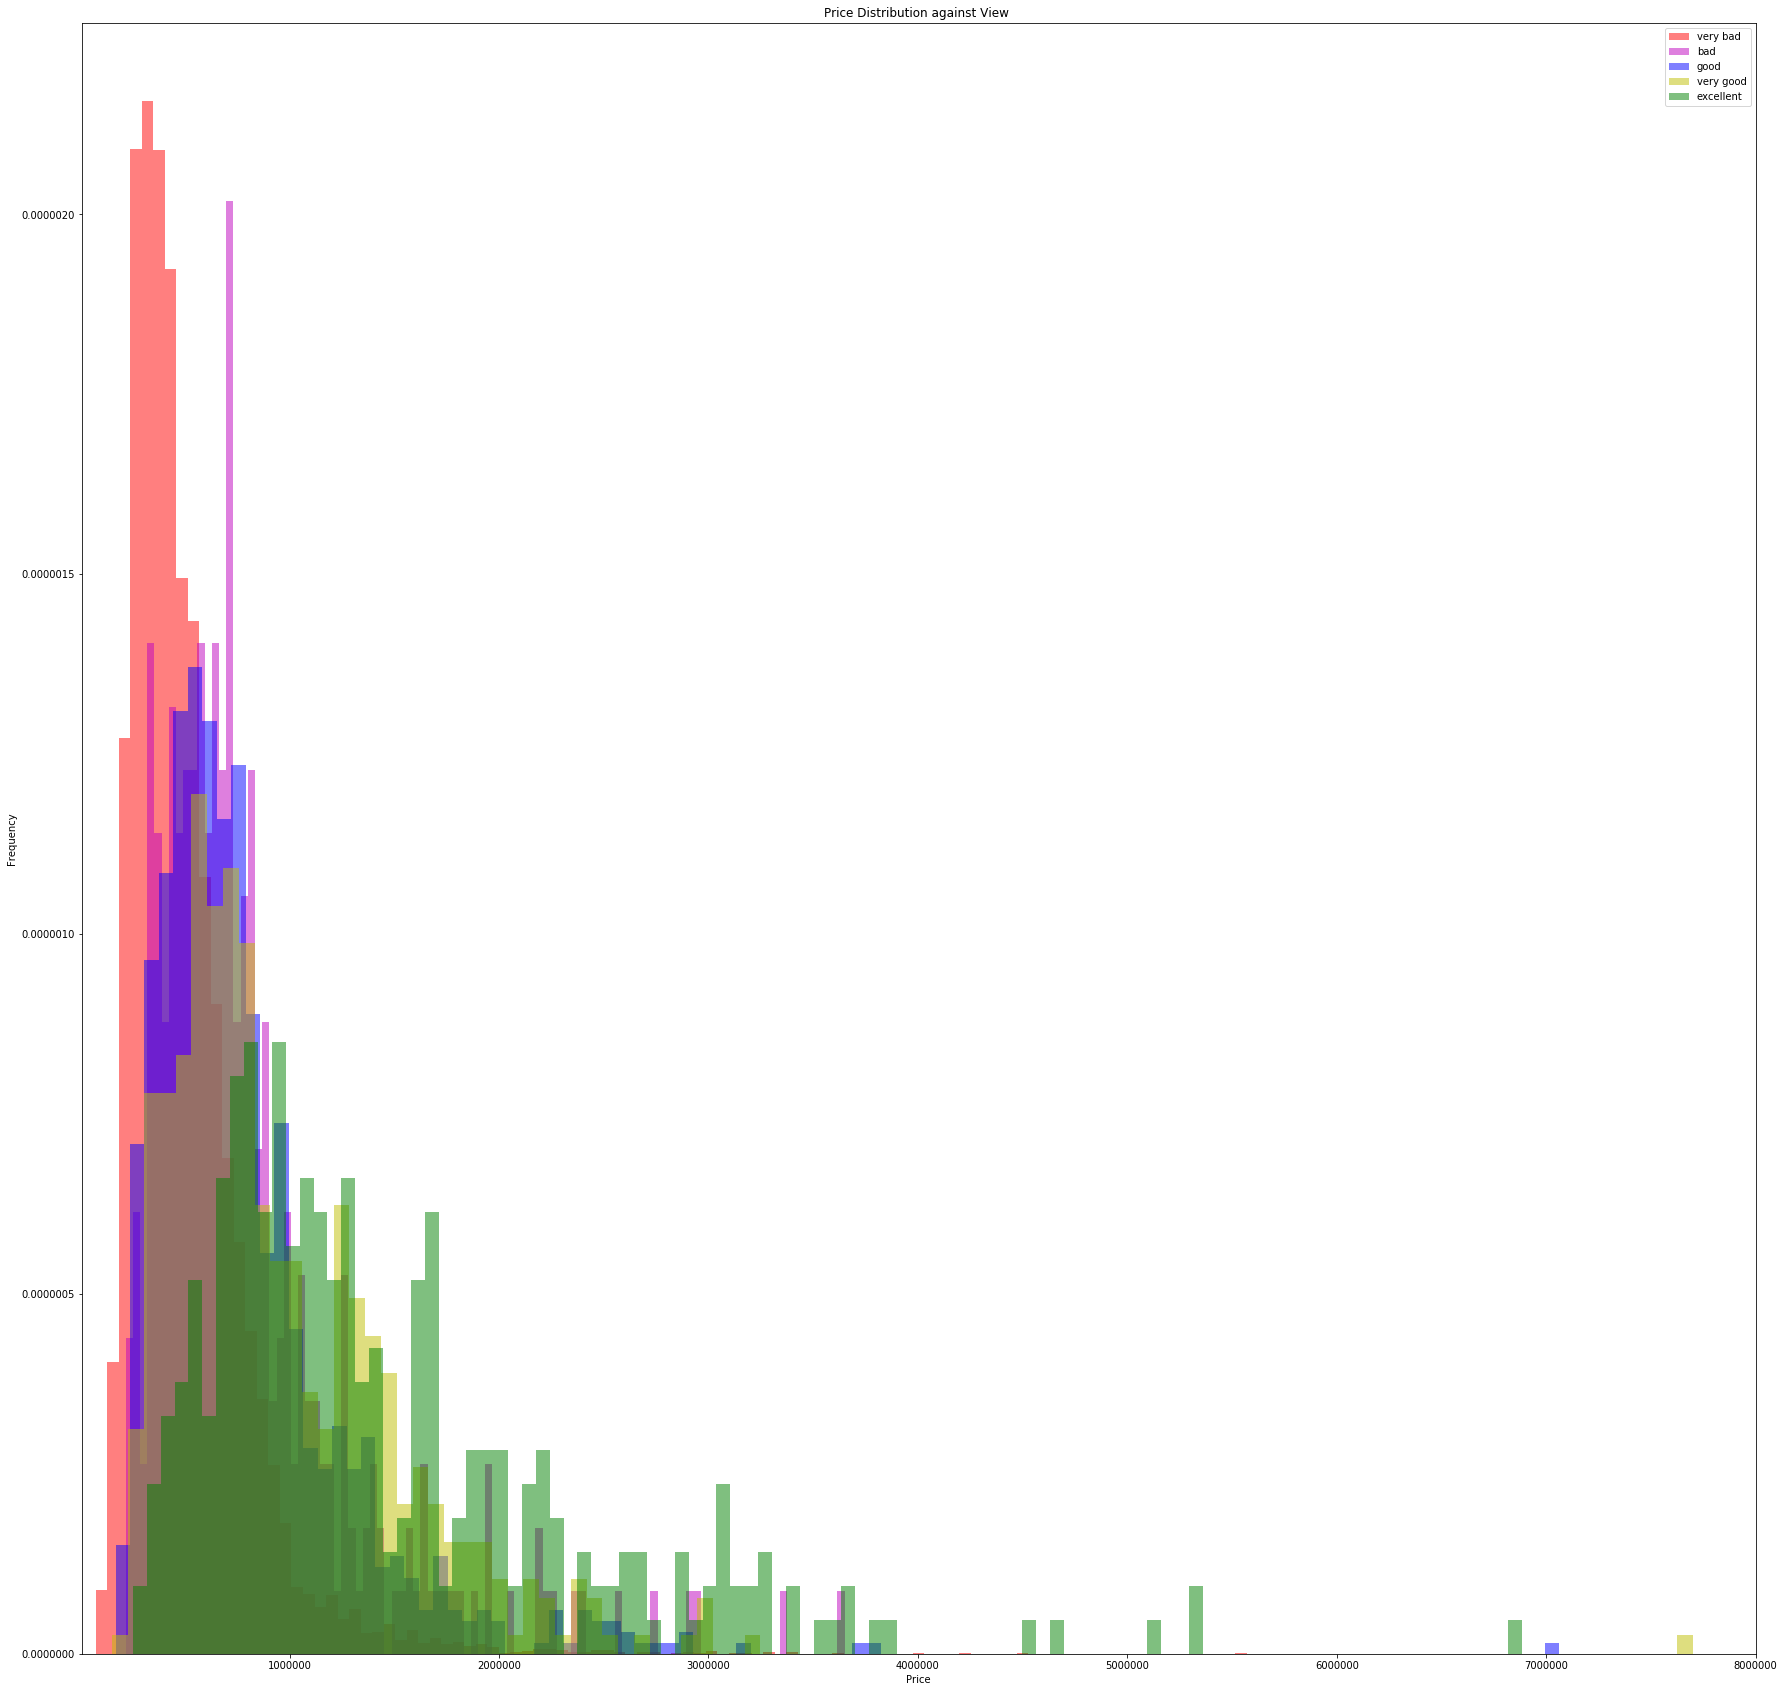

In [132]:
#df['price'].hist(by=df['view'])
#x1 = df.loc[df['view']==0].index
x0 = df.loc[df['view']==0,'price']
x1 = df.loc[df['view']==1,'price']
x2 = df.loc[df['view']==2,'price']
x3 = df.loc[df['view']==3,'price']
x4 = df.loc[df['view']==4,'price']

plt.figure(figsize = (30,30))
plt.hist(x0,bins=100,density=True,color='r',alpha = 0.5,label = 'very bad')
plt.hist(x1,bins=100,density=True,color='m',alpha = 0.5, label = 'bad')
plt.hist(x2,bins=100,density=True,color='b',alpha = 0.5,label = 'good')
plt.hist(x3,bins=100,density=True,color='y',alpha = 0.5, label = 'very good')
plt.hist(x4,bins=100,density=True,color='g',alpha = 0.5, label = 'excellent')
plt.xlim(7500,8000000)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution against View ')
plt.show()

- Summary: It can be seen that with the increase in price of property, the rating improve. It signifies that the property sold is the quality one.

Price Distribution against condition 

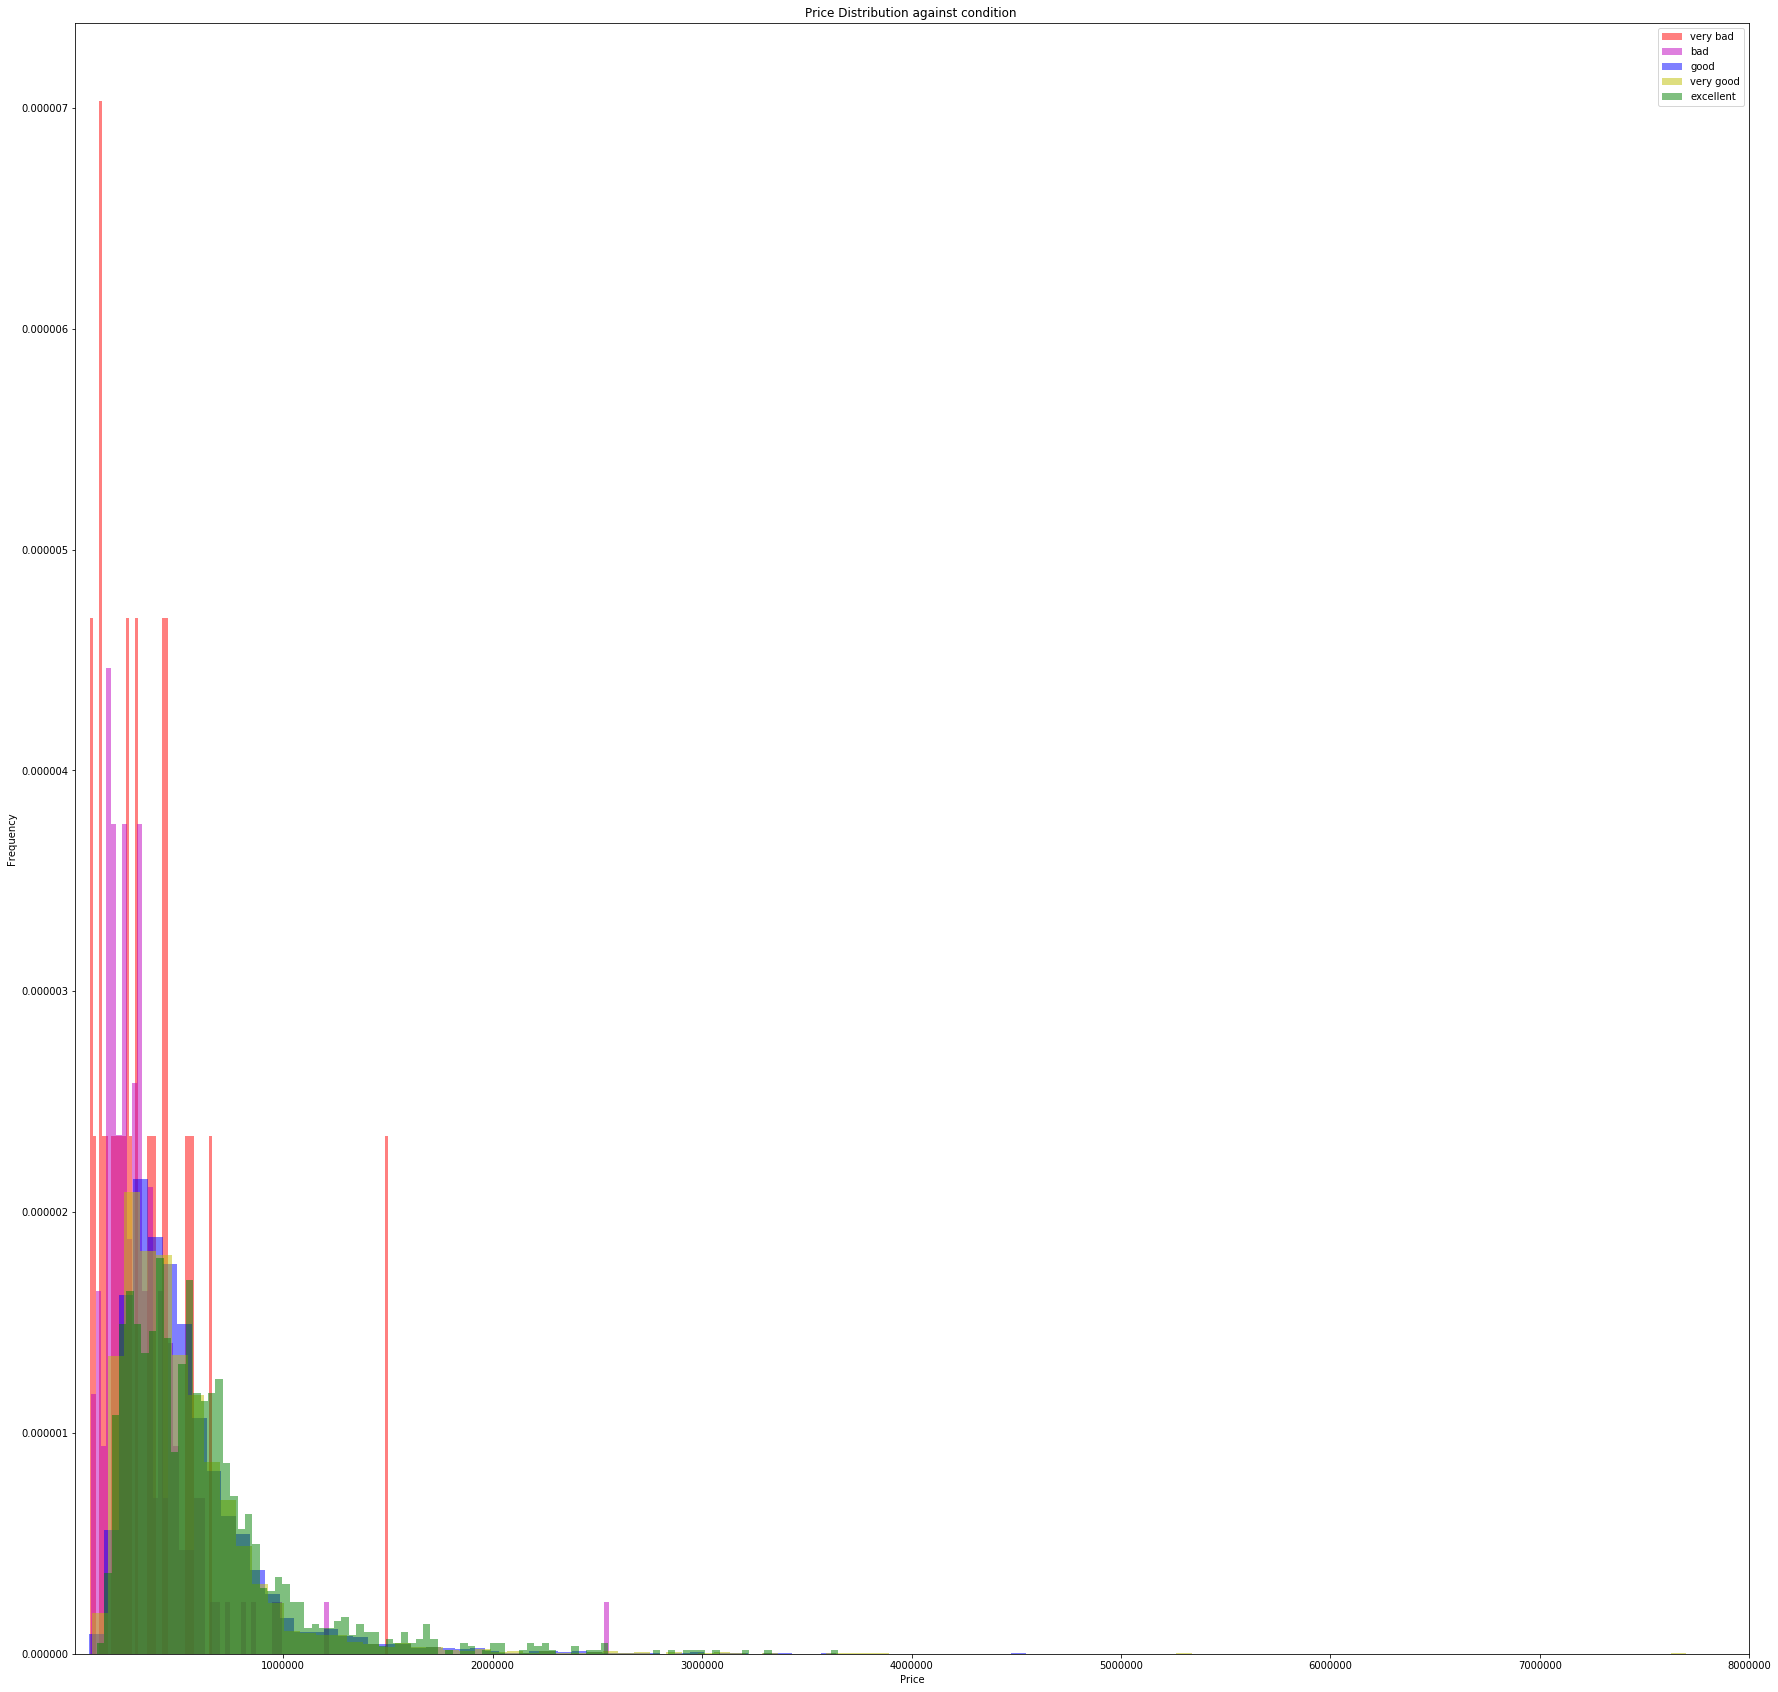

In [133]:
#df['price'].hist(by=df['view'])
#x1 = df.loc[df['view']==0].index
x1 = df.loc[df['condition']==1,'price']
x2 = df.loc[df['condition']==2,'price']
x3 = df.loc[df['condition']==3,'price']
x4 = df.loc[df['condition']==4,'price']
x5 = df.loc[df['condition']==5,'price']

plt.figure(figsize = (30,30))
plt.hist(x1,bins=100,density=True,color='r',alpha = 0.5,label = 'very bad')
plt.hist(x2,bins=100,density=True,color='m',alpha = 0.5, label = 'bad')
plt.hist(x3,bins=100,density=True,color='b',alpha = 0.5,label = 'good')
plt.hist(x4,bins=100,density=True,color='y',alpha = 0.5, label = 'very good')
plt.hist(x5,bins=100,density=True,color='g',alpha = 0.5, label = 'excellent')
plt.xlim(7500,8000000)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution against condition ')
plt.show()

- Summary: It can be seen that most of the property has a very bad condition. This shows that how property seller are maintaining the property or building it. Same behavior as above follows here. The condition of the property improves with the increase in price.

Price Distribution Against Grade

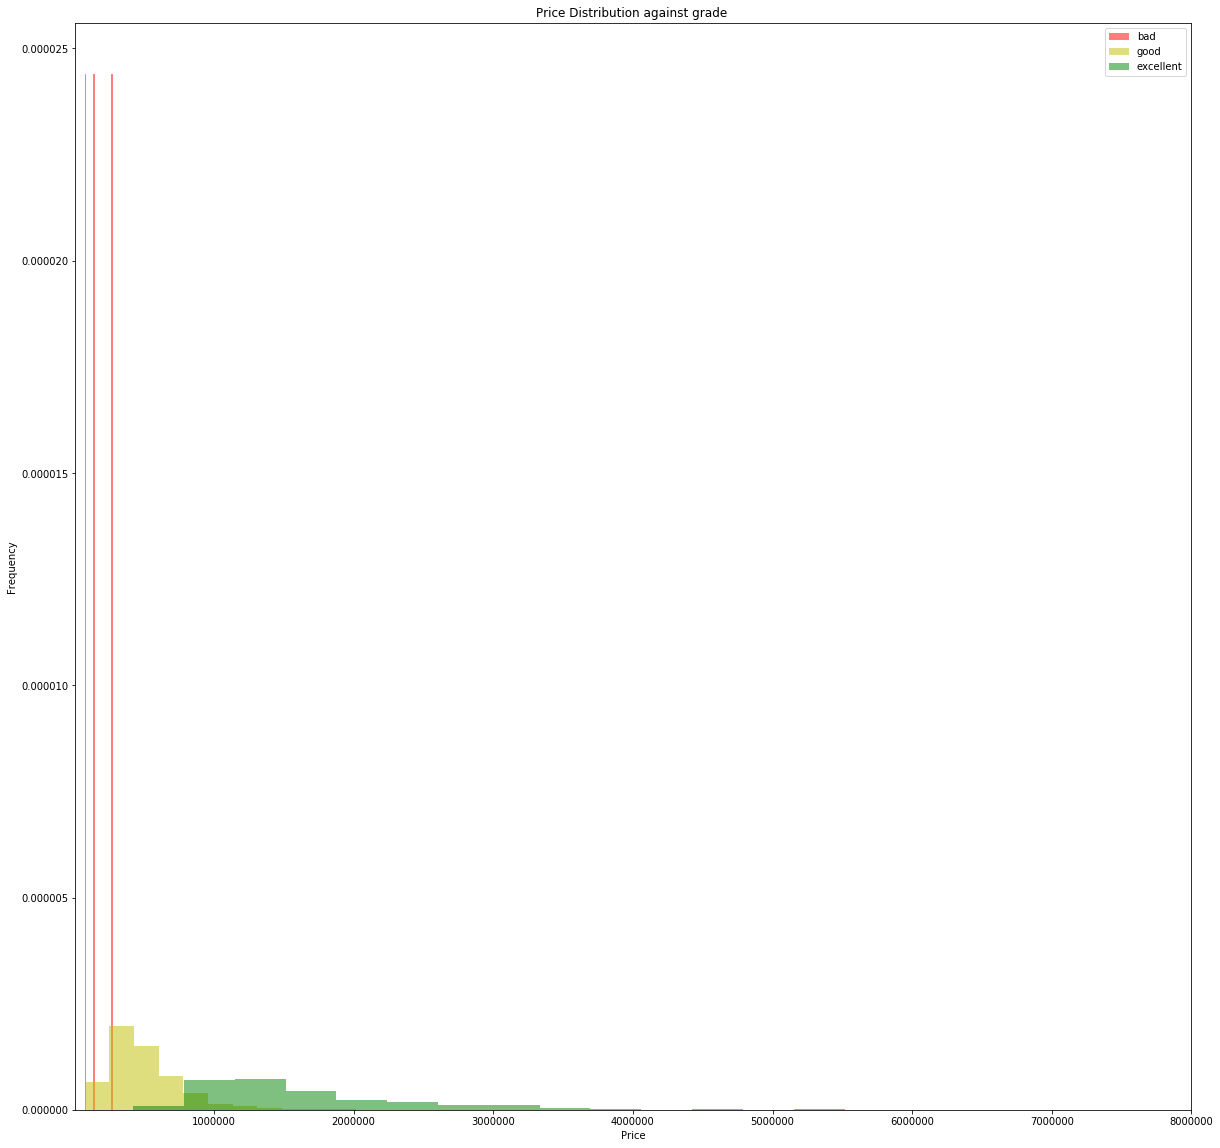

In [134]:
#df['price'].hist(by=df['view'])
#x1 = df.loc[df['view']==0].index
x1 = df.loc[df['grade']<4,'price']
x2 = df.loc[df['grade']<11,'price']
x3 = df.loc[df['grade']>10,'price']


plt.figure(figsize = (20,20))
plt.hist(x1,bins=20,density=True,color='r',alpha = 0.5,label = 'bad')
plt.hist(x2,bins=20,density=True,color='y',alpha = 0.5, label = 'good')
plt.hist(x3,bins=20,density=True,color='g',alpha = 0.5,label = 'excellent')

plt.xlim(7500,8000000)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution against grade ')
plt.show()

- Summary: It can be seen that the very low price properties are not fit for accomodation.

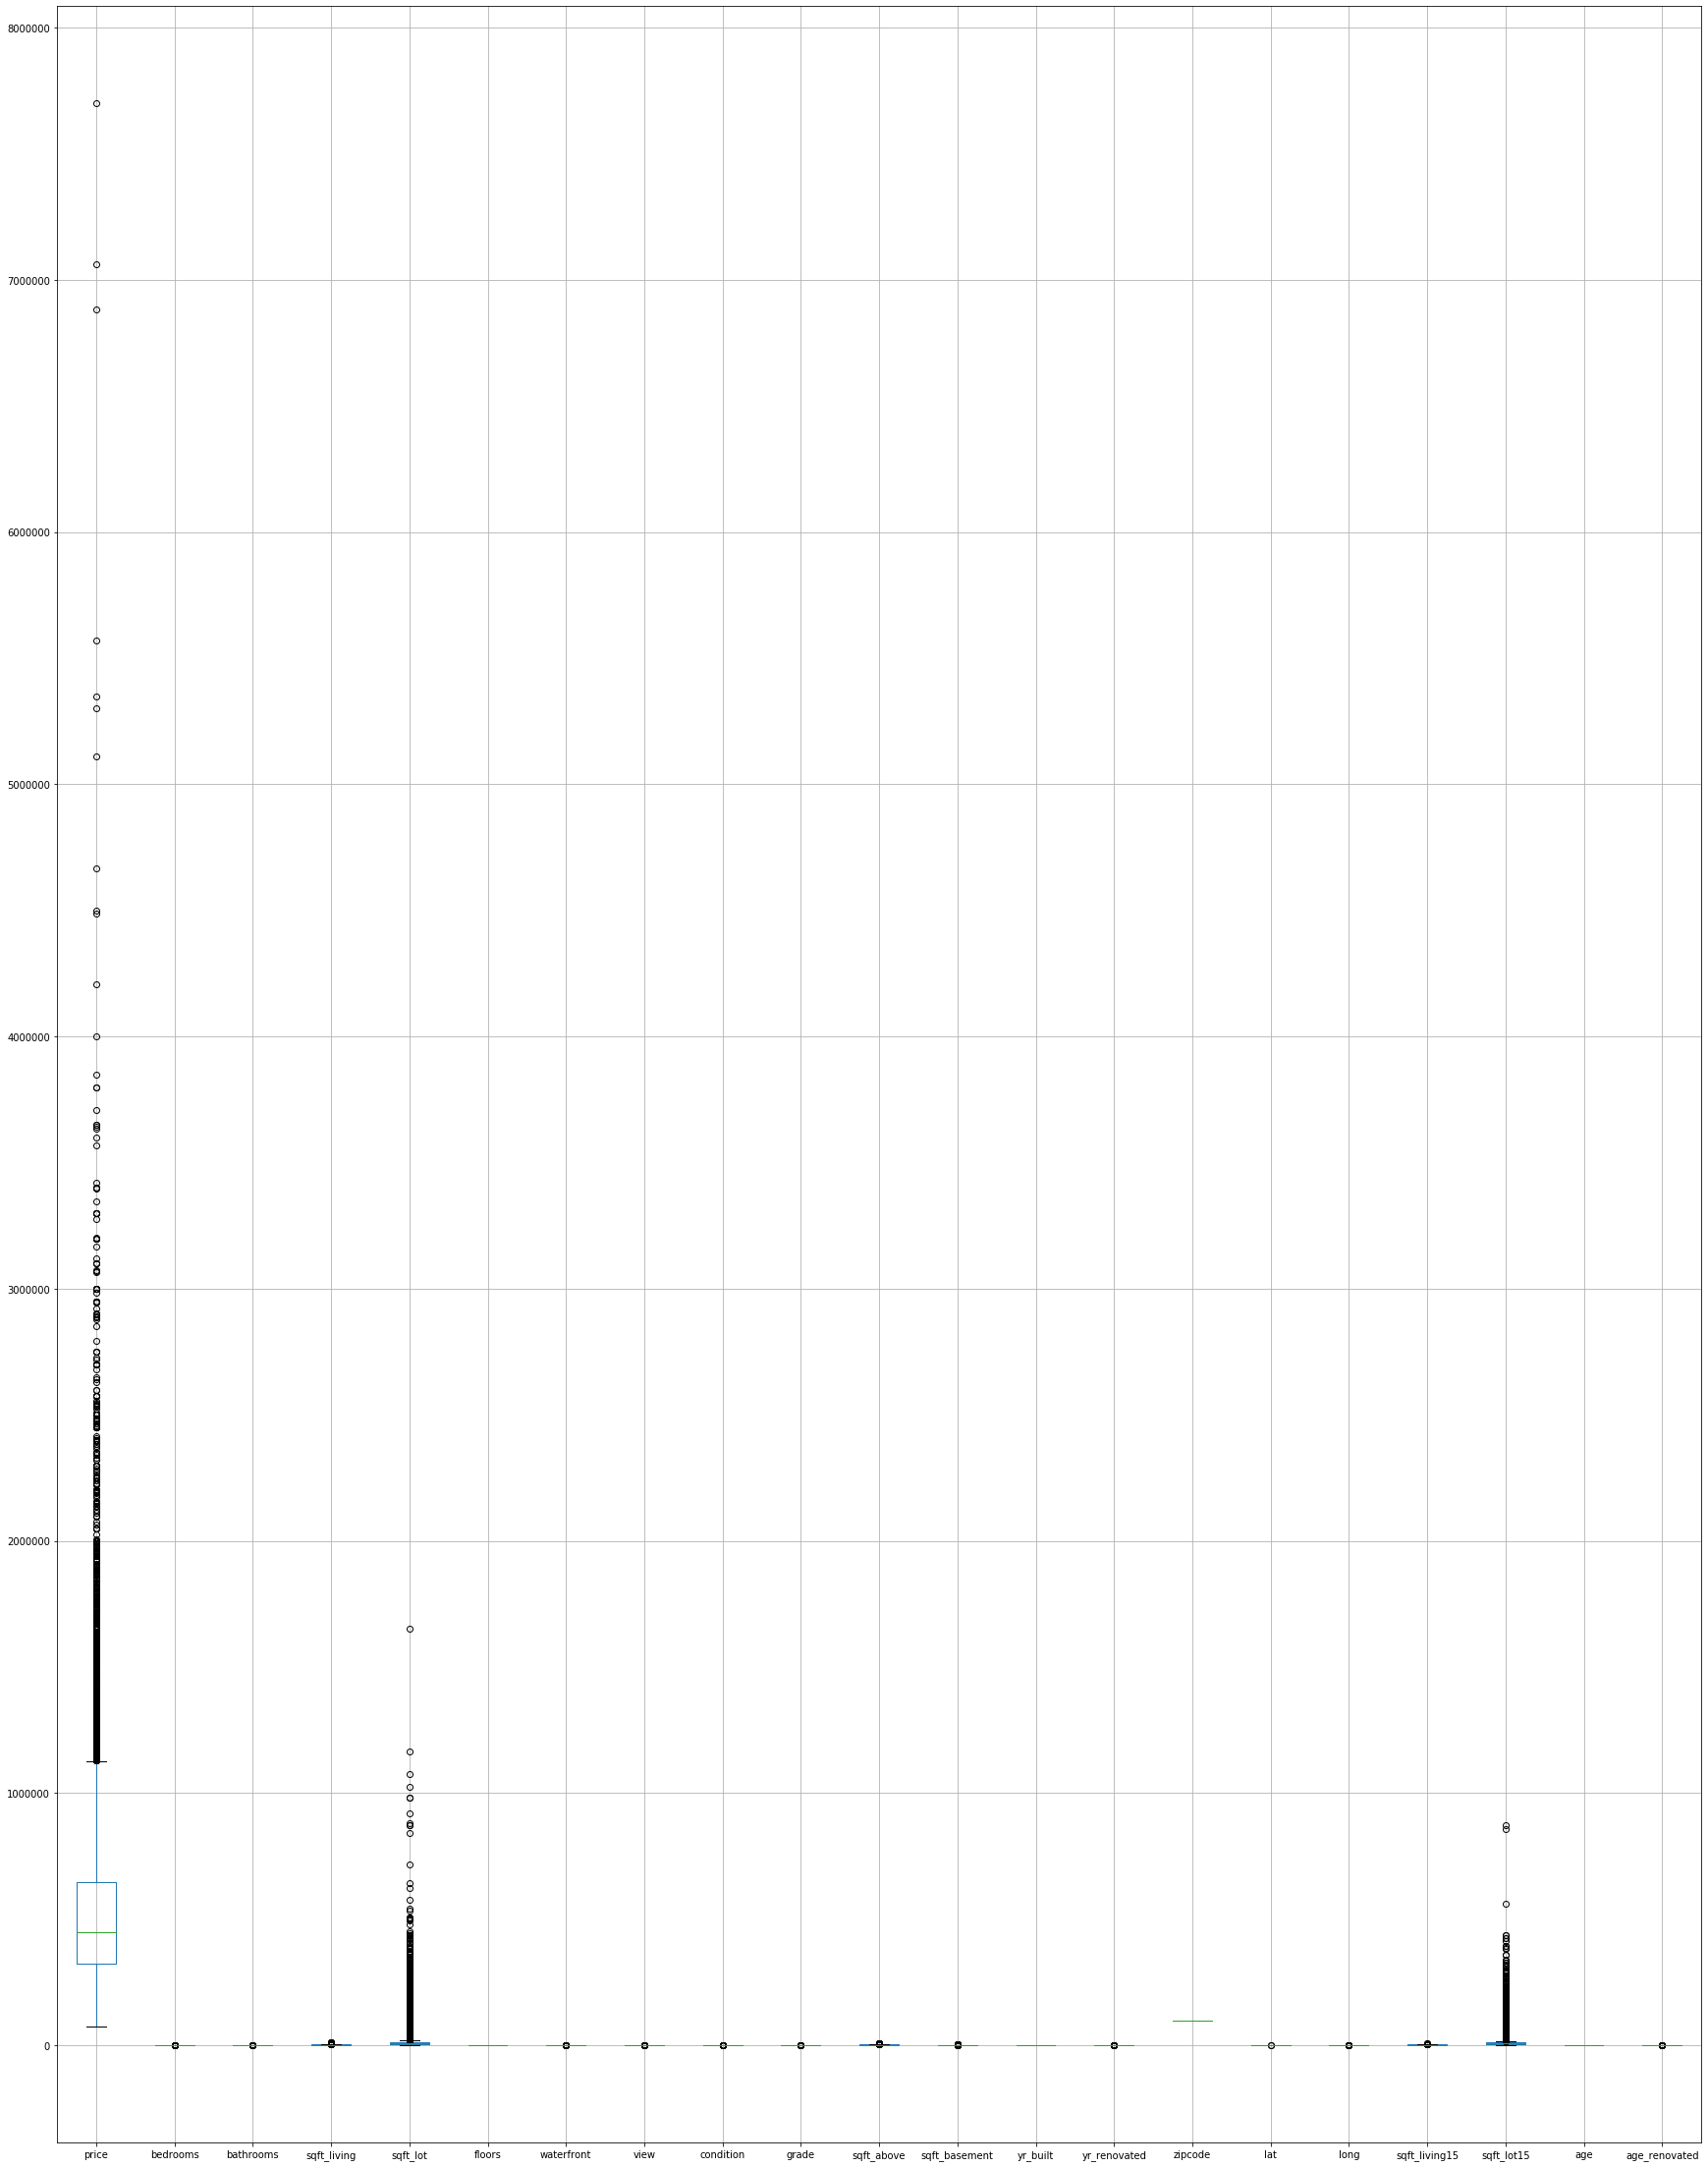

In [153]:
df.iloc[:,2:23].boxplot(figsize=(30,40))
plt.show()

Most of the varaibles has outliers. But we can't ignore the outliers. As mentioned above that there are very less customers who might buy high prices property. 

- Bivariate Analysis - It is a methodical statistical technique applied to a pair of variables (features/ attributes) of data to determine the empirical relationship between them.

It's a general idea that the prices of houses depend upon the size of property, no. of bedrroms and no. of bathrooms. It will show a positive relation against it.  Also, if the size of plot increases then the no. of bedrooms and no. of bathrooms would also increase.

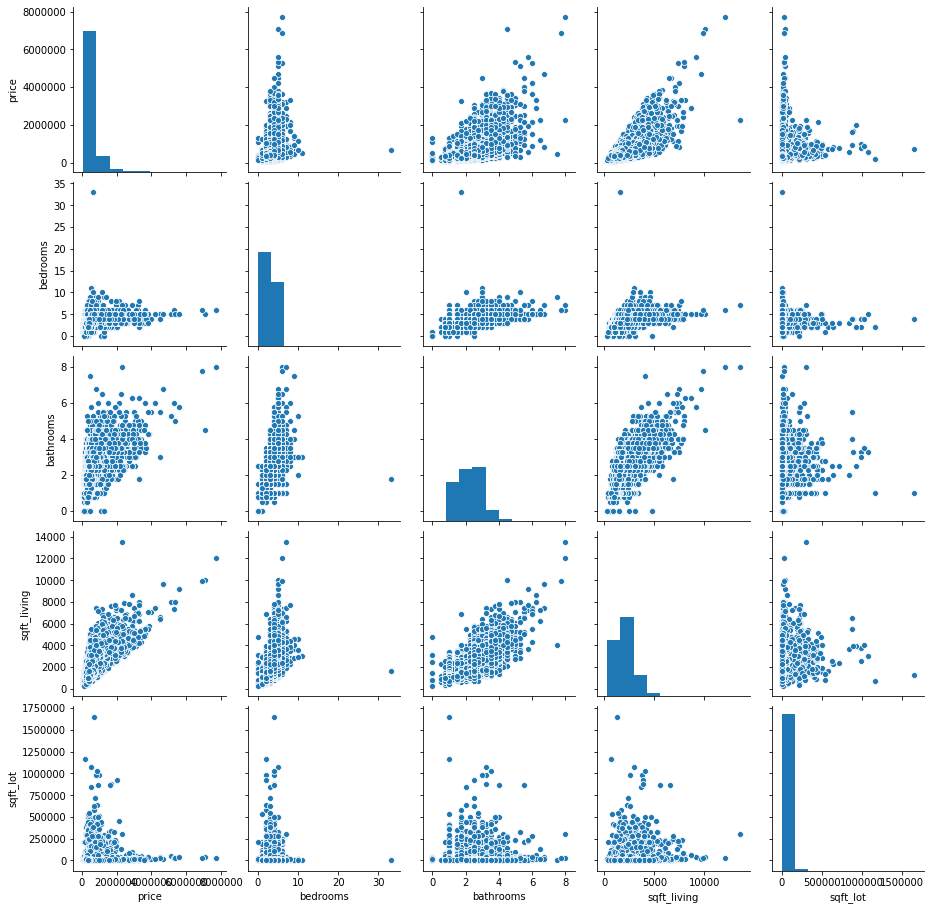

In [167]:
sns.pairplot(df[['price','bedrooms','bathrooms','sqft_living','sqft_lot']],diag_kind="hist")

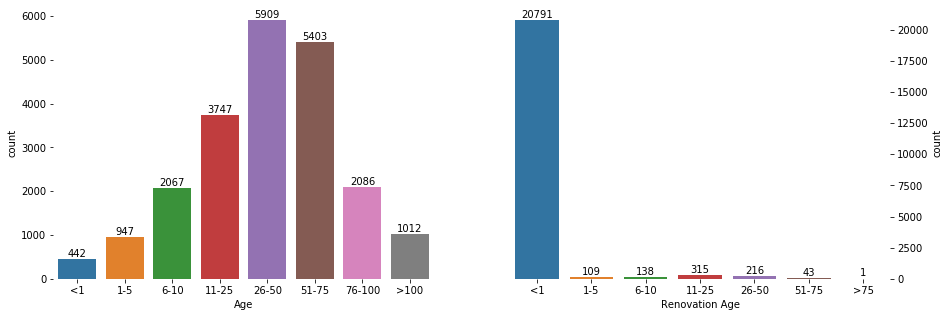

In [161]:
# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df['age_binned'] = pd.cut(df['age'], bins=bins, labels=labels)
# partition the age_renovated into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df['age_renovated_binned'] = pd.cut(df['age_renovated'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df['age_renovated_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
df = pd.get_dummies(df, columns=['age_binned','age_renovated_binned'])

- Summary: This shows that the with increase in time/age the demand of a property increases and after reaching a certain age, the demand tend to fall. And also when a house is newly renovated, the demand of the property shoots up.

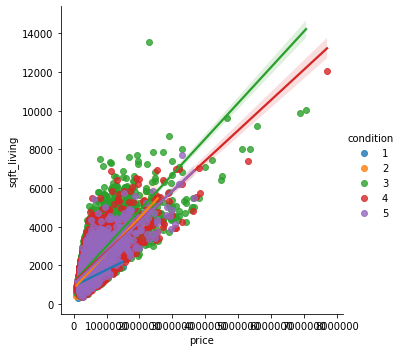

In [173]:
sns.lmplot(x='price', y ='sqft_living', data= df, hue='condition')

- Summary: Astonishingly, it can be seen that the price set to increase even when the condition is poor with the increase of sqft of living. The other features may play a role in this. If the house property is in middle of city then the proprty might increase even the condition is poor. As the price of land in city area would be very due to very high population.

In [184]:
#Getting rid of extra fields that were while binning.
df = df.iloc[:,:23]

In [185]:
#As ID and date columns are not required we will drop from the dataframe. The correlation has been verified for the id and it shows a negative correlation. Date column is required as we have already calculated the age and renovation age and made the inferences.
df = df.iloc[:,2:23]

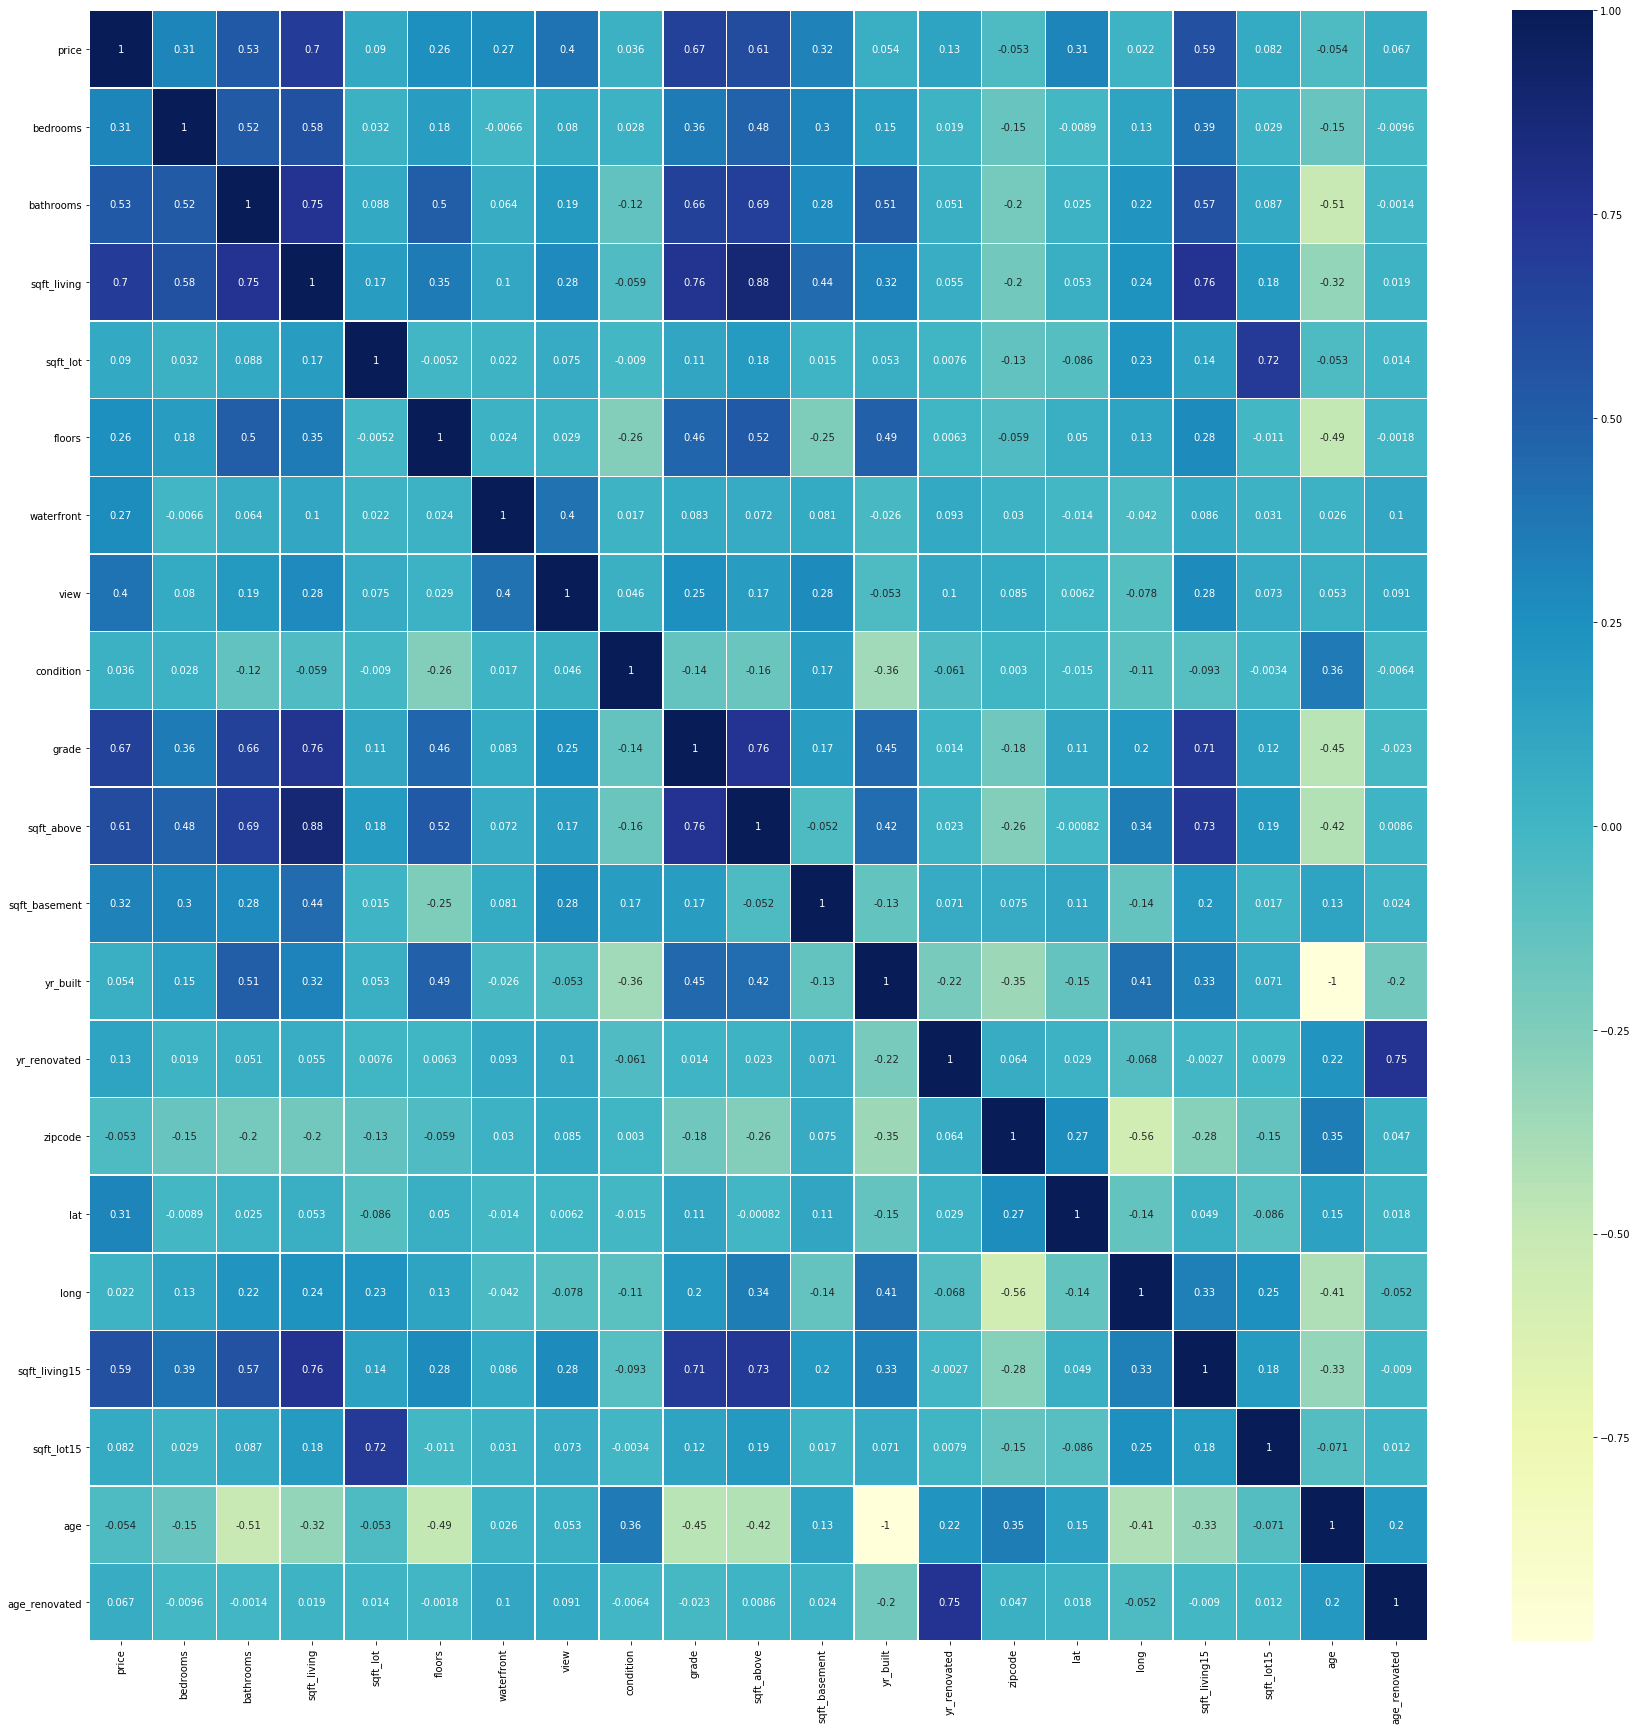

In [186]:
#create the correlation matrix heat map
plt.figure(figsize=(30,30))

sns.heatmap(df.corr(),linewidths=.5,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

In [191]:
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age_renovated']

In [194]:
# create X and y
from sklearn.linear_model import LinearRegression
X = df[feature_cols]
y = df.price

#create train and test split
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=42)

#without using train and test split dataset
lm = LinearRegression()
lm.fit(xtrain, ytrain)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)



-34929476.23064945
[-3.29599509e+04  4.07362913e+04  1.10590059e+02  9.64440501e-02
  1.89721965e+01  5.55148603e+05  5.21633350e+04  2.83101584e+04
  9.51898048e+04  7.28476447e+01  3.77424143e+01 -2.43934132e+03
  5.10636926e+01  5.56620223e+05 -1.02875148e+05  2.22418330e+01
 -3.39450038e-01 -2.93589638e+03]


In [203]:
y_pred = lm.predict(xtest)
y_test = ytest.values
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 464553.    365000.  ]
 [ 772928.63  865000.  ]
 [1216840.59 1038000.  ]
 ...
 [ 384855.02  410500.  ]
 [ 808668.97  940000.  ]
 [ 568188.81  410000.  ]]


In [212]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

43906432804.90951
0.5451706085070955
